# Assignment 12 — Random Forest on Glass dataset (demonstration)

This notebook uses the uploaded `glass (1).xlsx` file as a reference for variable names. Because the uploaded file contains descriptions only (no rows), we create a synthetic dataset with the same features to demonstrate Random Forest, Bagging and Boosting methods.

## 1. Libraries and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(42)
plt.rcParams['figure.figsize'] = (8,5)


## 2. Load reference and infer feature names

In [2]:
ref = pd.read_excel('/mnt/data/glass (1).xlsx', header=None)
print('Reference preview:')
print(ref.head(20).to_string())

# Manually extract common Glass dataset feature names based on the description text
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
target = 'Type'
print('Using features:', features, 'and target:', target)


Reference preview:
                                                                                               0
0                                   Prepare a model for glass classification using Random Forest
1                                                                              Data Description:
2                                                                          RI : refractive index
3   Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4                                                                                  Mg: Magnesium
5                                                                                   AI: Aluminum
6                                                                                    Si: Silicon
7                                                                                    K:Potassium
8                                                                                    Ca: Calcium
9          

## 3. Create synthetic dataset

In [3]:
# Create synthetic numeric features roughly matching expected ranges
n = 200
data = pd.DataFrame({
    'RI': np.random.normal(1.518, 0.005, n),
    'Na': np.random.normal(13.0, 2.0, n),
    'Mg': np.random.normal(3.0, 1.5, n),
    'Al': np.random.normal(1.5, 1.0, n),
    'Si': np.random.normal(72.0, 1.0, n),
    'K': np.random.normal(0.5, 0.3, n),
    'Ca': np.random.normal(8.0, 1.5, n),
    'Ba': np.random.normal(0.1, 0.05, n),
    'Fe': np.random.normal(0.1, 0.05, n),
})
# Synthetic target with 3 classes to keep balance
data['Type'] = np.random.choice([1,2,3], size=n, p=[0.5,0.3,0.2])
print('Synthetic dataset shape:', data.shape)
print(data.head())


Synthetic dataset shape: (200, 10)
         RI         Na        Mg        Al         Si         K        Ca  \
0  1.520484  13.715575  0.608359  2.256989  72.938284  0.919807  8.187837   
1  1.517309  14.121569  2.100937  0.577835  71.483955  0.777390  7.355892   
2  1.521238  15.166102  3.007866  2.369606  72.096121  0.517889  8.183446   
3  1.525615  15.107604  3.070471  2.855638  71.537725  0.305919  8.814947   
4  1.516829  10.244661  2.324902  1.913435  71.565504  0.709467  8.073290   

         Ba        Fe  Type  
0  0.047654  0.090855     1  
1  0.126833  0.168744     2  
2  0.159285  0.067702     3  
3  0.135948  0.060040     1  
4  0.149802  0.075863     1  


## 4. EDA: missing values, distributions, correlations

Missing values per column:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Descriptive stats:
                RI          Na          Mg          Al          Si           K  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     1.517796   13.171736    2.871517    1.508967   72.128251    0.540090   
std      0.004655    1.974008    1.491063    1.019574    0.955933    0.309097   
min      1.504901    6.517465   -0.707467   -1.196887   69.576121   -0.368877   
25%      1.514474   11.788325    1.809182    0.793531   71.469099    0.348762   
50%      1.517979   13.157679    2.883600    1.522262   72.130537    0.559327   
75%      1.520504   14.374462    3.858132    2.185177   72.718316    0.762040   
max      1.531601   20.705463    7.618321    4.132382   74.526932    1.231926   

               Ca          Ba          Fe        Type  
count  200.000000  200.000000  200.000000  200.00000

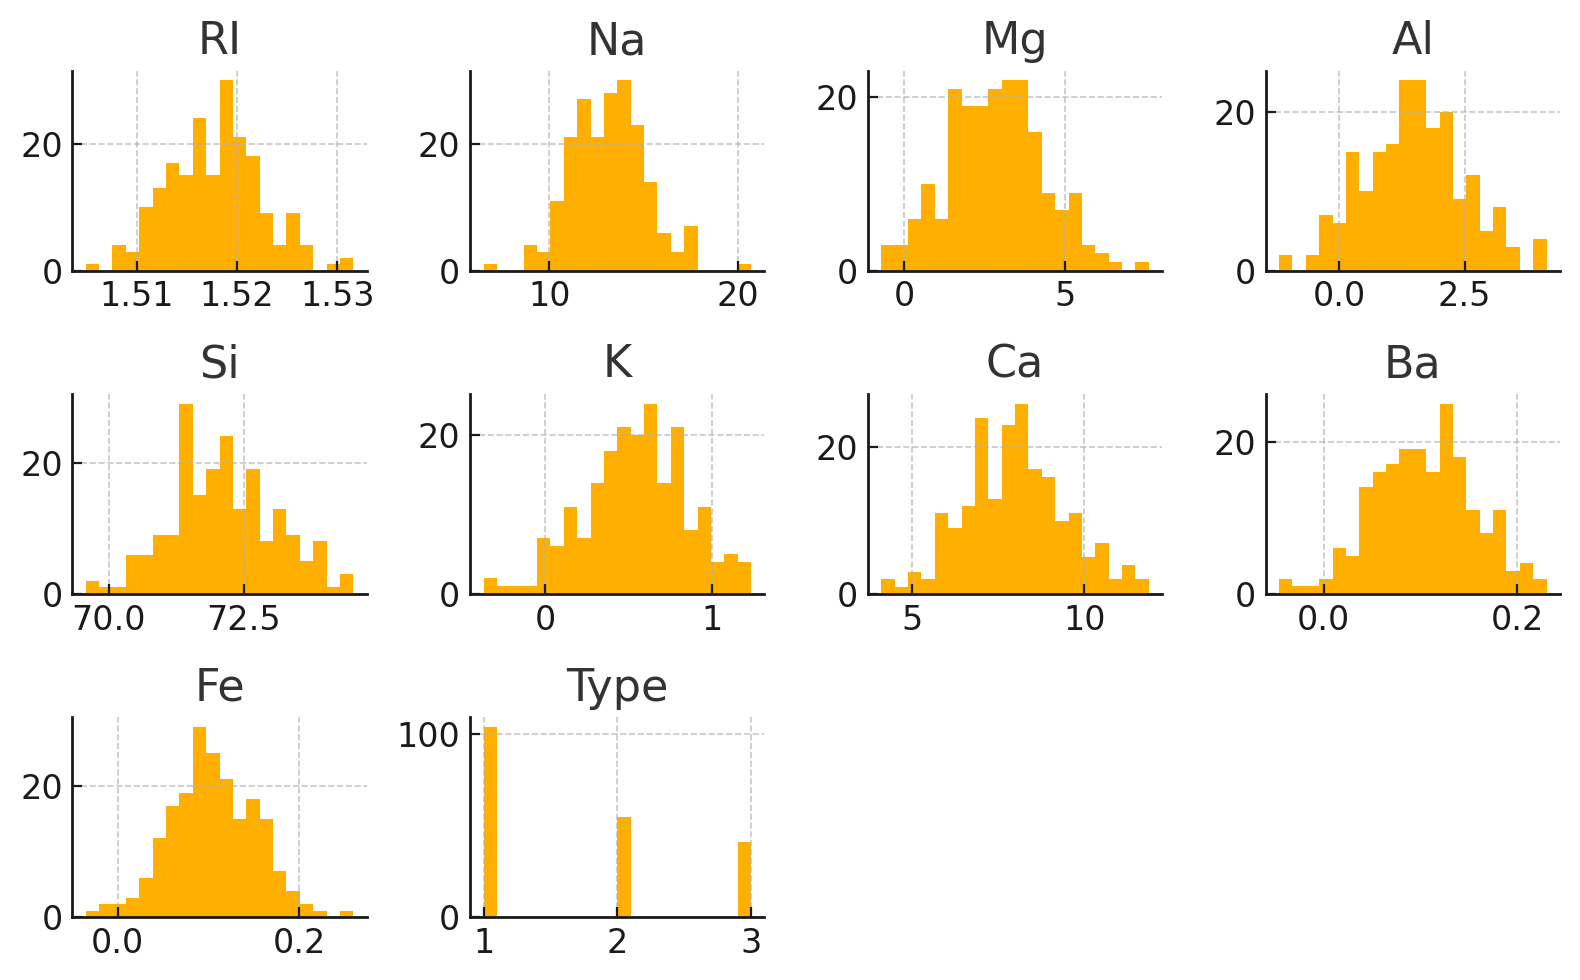

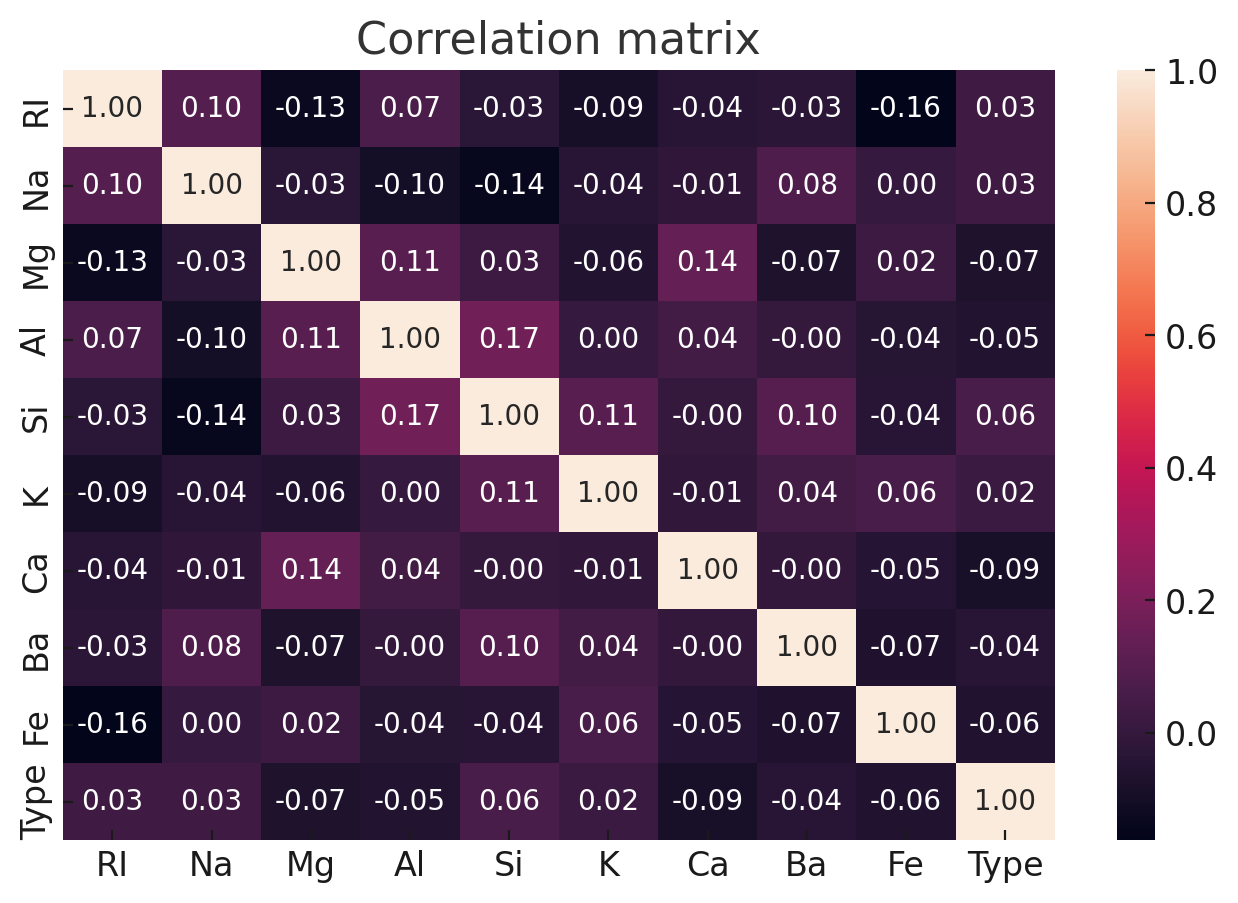

In [4]:
print('Missing values per column:\n', data.isna().sum())
print('\nDescriptive stats:\n', data.describe())

# Histograms
data.hist(bins=20, layout=(3,4));
plt.tight_layout()
plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, fmt='.2f');
plt.title('Correlation matrix')
plt.show()


## 5. Preprocessing and Train/Test split

In [5]:
X = data.drop('Type', axis=1)
y = data['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print('Train/test sizes:', X_train.shape, X_test.shape)


Train/test sizes: (150, 9) (50, 9)


## 6. Random Forest implementation and evaluation

RF Accuracy: 0.5

Classification report:
               precision    recall  f1-score   support

           1       0.54      0.73      0.62        26
           2       0.50      0.36      0.42        14
           3       0.20      0.10      0.13        10

    accuracy                           0.50        50
   macro avg       0.41      0.40      0.39        50
weighted avg       0.46      0.50      0.47        50

Confusion matrix:
 [[19  3  4]
 [ 9  5  0]
 [ 7  2  1]]


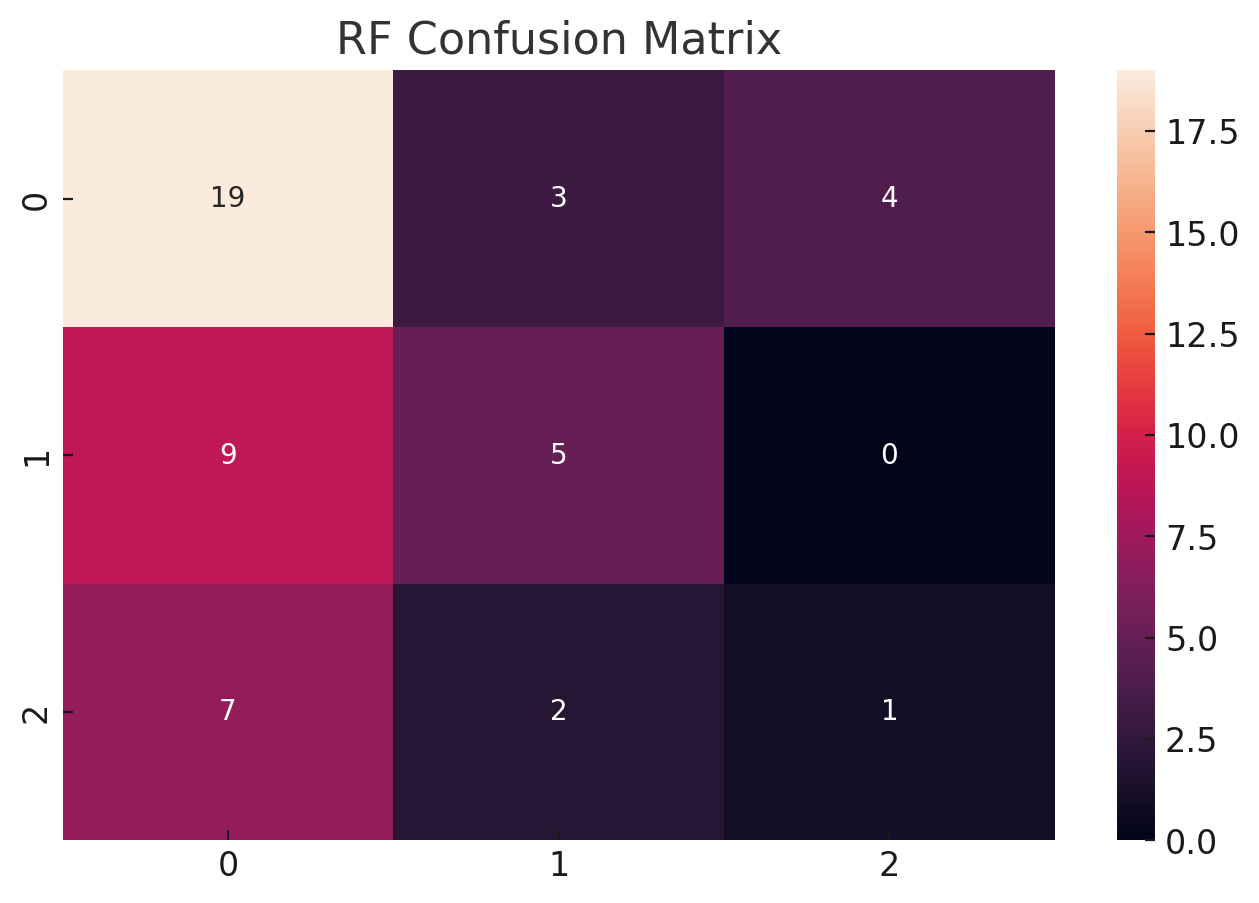

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('RF Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)
sns.heatmap(cm, annot=True, fmt='d'); plt.title('RF Confusion Matrix'); plt.show()


## 7. Bagging (BaggingClassifier)

In [7]:
bag = BaggingClassifier(n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
yb = bag.predict(X_test)
print('Bagging Accuracy:', accuracy_score(y_test, yb))


Bagging Accuracy: 0.5


## 8. Boosting (AdaBoost)

In [8]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
ya = ada.predict(X_test)
print('AdaBoost Accuracy:', accuracy_score(y_test, ya))


AdaBoost Accuracy: 0.4


## 9. Comparison & Notes
- Bagging (ensemble of independent trees) reduces variance by averaging. 
- Boosting (sequential learners) focuses on hard examples and can reduce bias.
- For imbalance, use stratified sampling, resampling (SMOTE/undersampling), or class-weighted models.


## End